## Importing the libraries

In [ ]:
import pandas as pd
import pandas_datareader as web
import datetime as dt
import yfinance as yf
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

### Loading the dataset

In [ ]:
crypto = ['BTC', 'ETH', 'BCH', 'LTC', 'BNB', 'USDT', 'XRP', 'LINK', 'DOT',
          'ADA', 'BSV', 'CRO', 'EOS', 'XTZ', 'XLM', 'TRX', 'NEO', 'ATOM', 'VET', 'MKR']

against_currency ="USD"

start = dt.datetime(2022,1,1)
end = dt.datetime.now()


# Fetching historical price data for all cryptocurrencies
data =pd.DataFrame()
for crypto_currency in crypto:
    all_data = yf.download(f'{crypto_currency}-{against_currency}', start=start, end=end)
    all_data ['crypto_currency']= crypto_currency
    data= pd.concat([data, all_data])
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Open,High,Low,Close,Adj Close,Volume,crypto_currency
Date,,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004,BTC
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547,BTC
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362,BTC
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,45897.574219,42494677905,BTC
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859,BTC
...,...,...,...,...,...,...,...
2023-05-18,639.509460,640.257935,618.999573,626.032959,626.032959,12454815,MKR
2023-05-19,626.090515,631.710266,623.452332,627.951355,627.951355,10427856,MKR
2023-05-20,627.999939,628.539185,622.819031,625.575134,625.575134,12260558,MKR


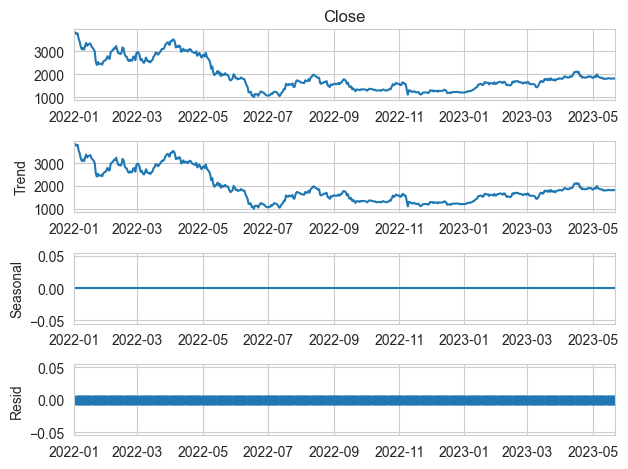

In [ ]:
# extract the price data for Bitcoin
btc_data = data[data['crypto_currency'] == 'ETH']['Close']

# perform seasonal decomposition on the Bitcoin price data
results = seasonal_decompose(btc_data, model='additive',period=1)

# plot the results
results.plot()
plt.show()

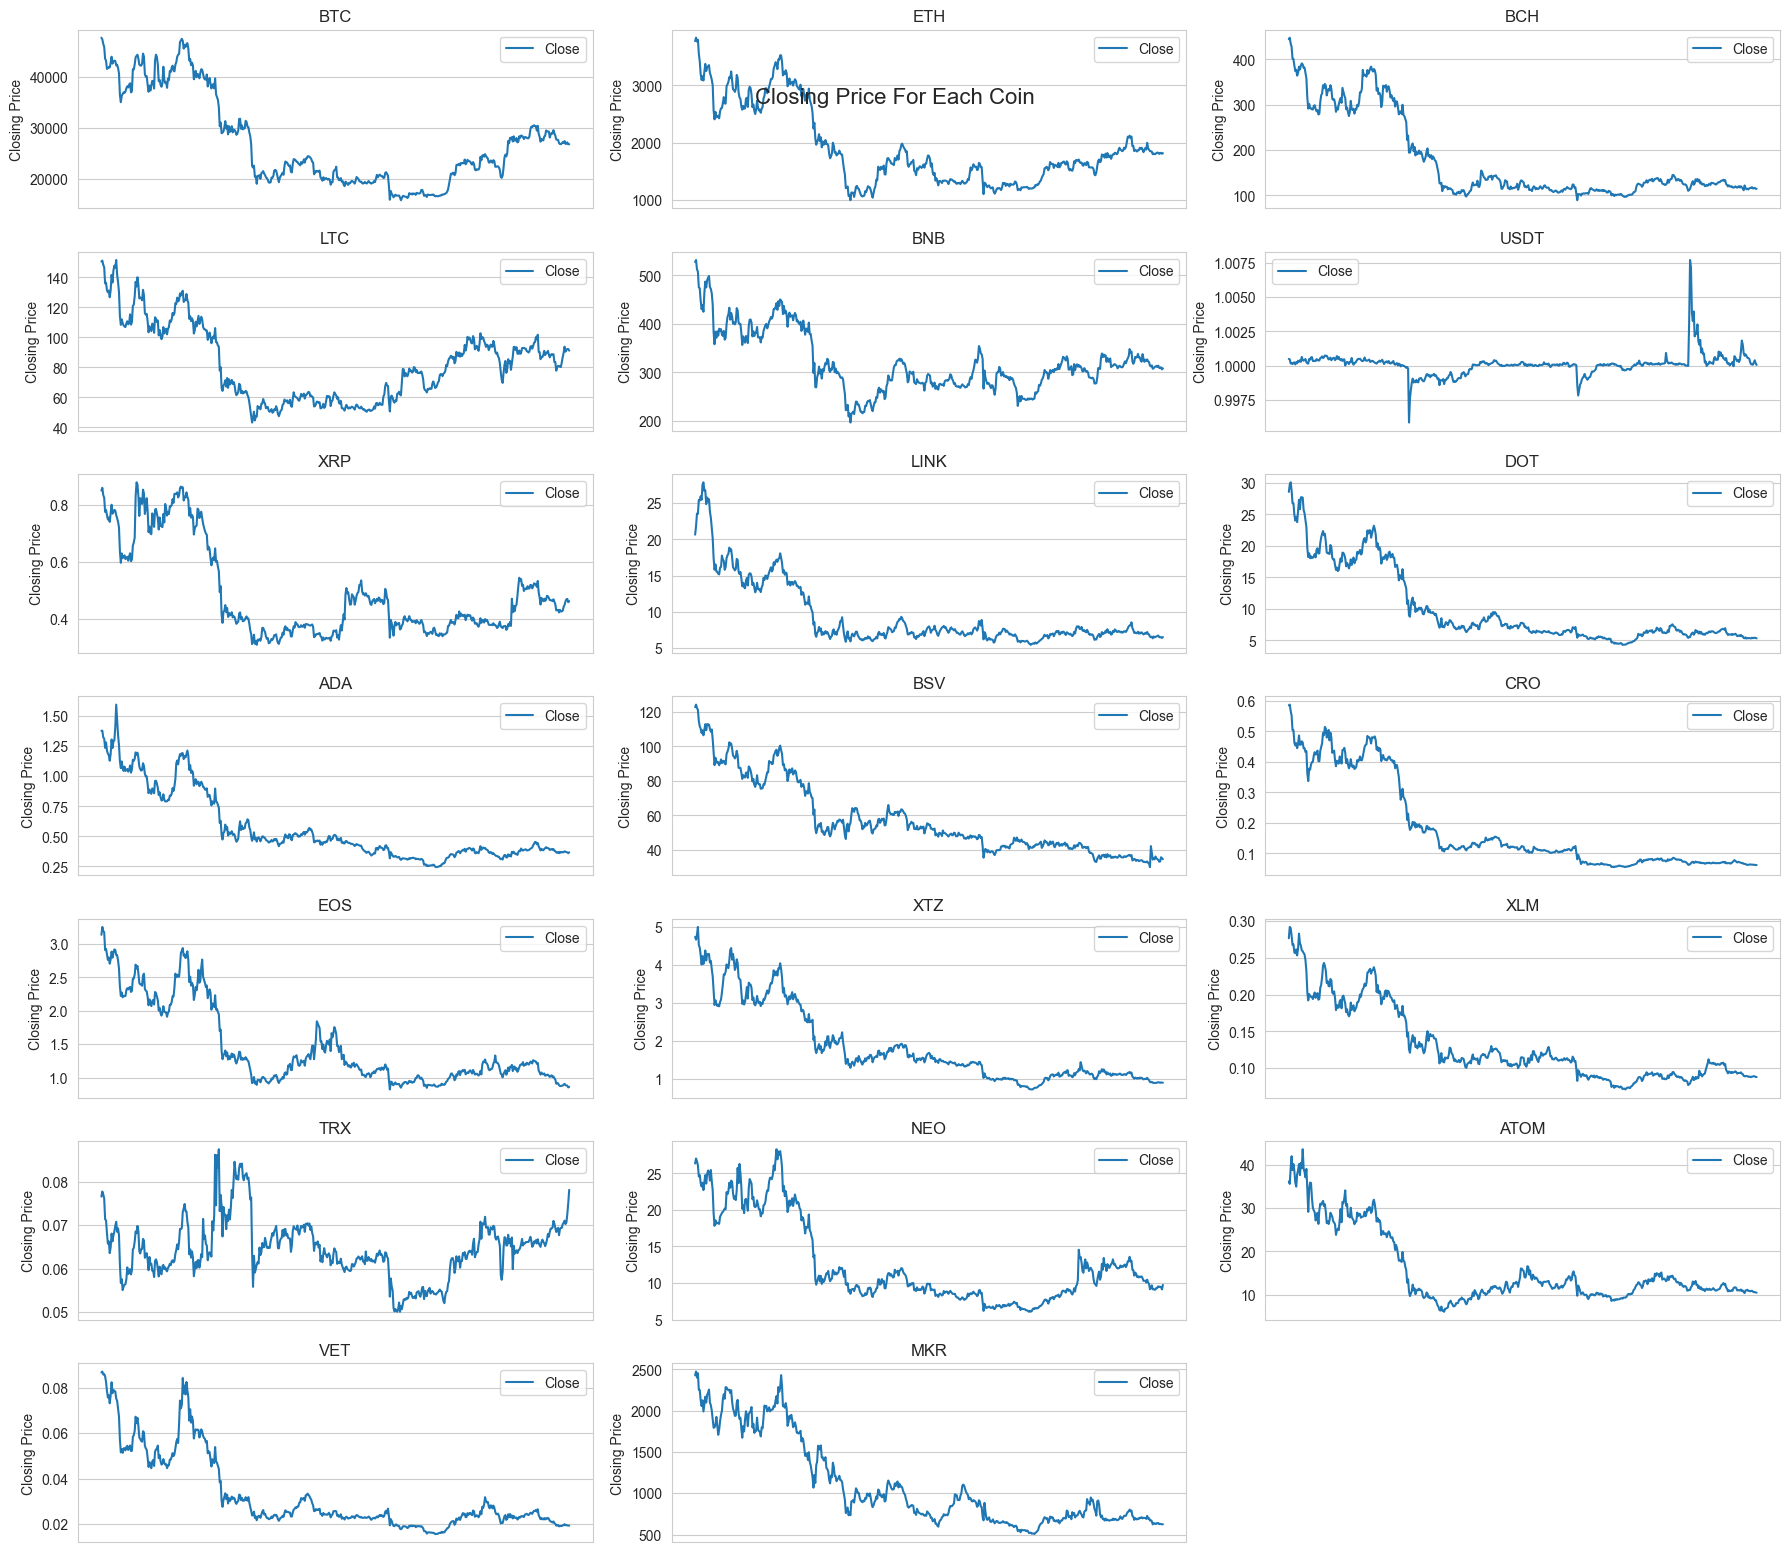

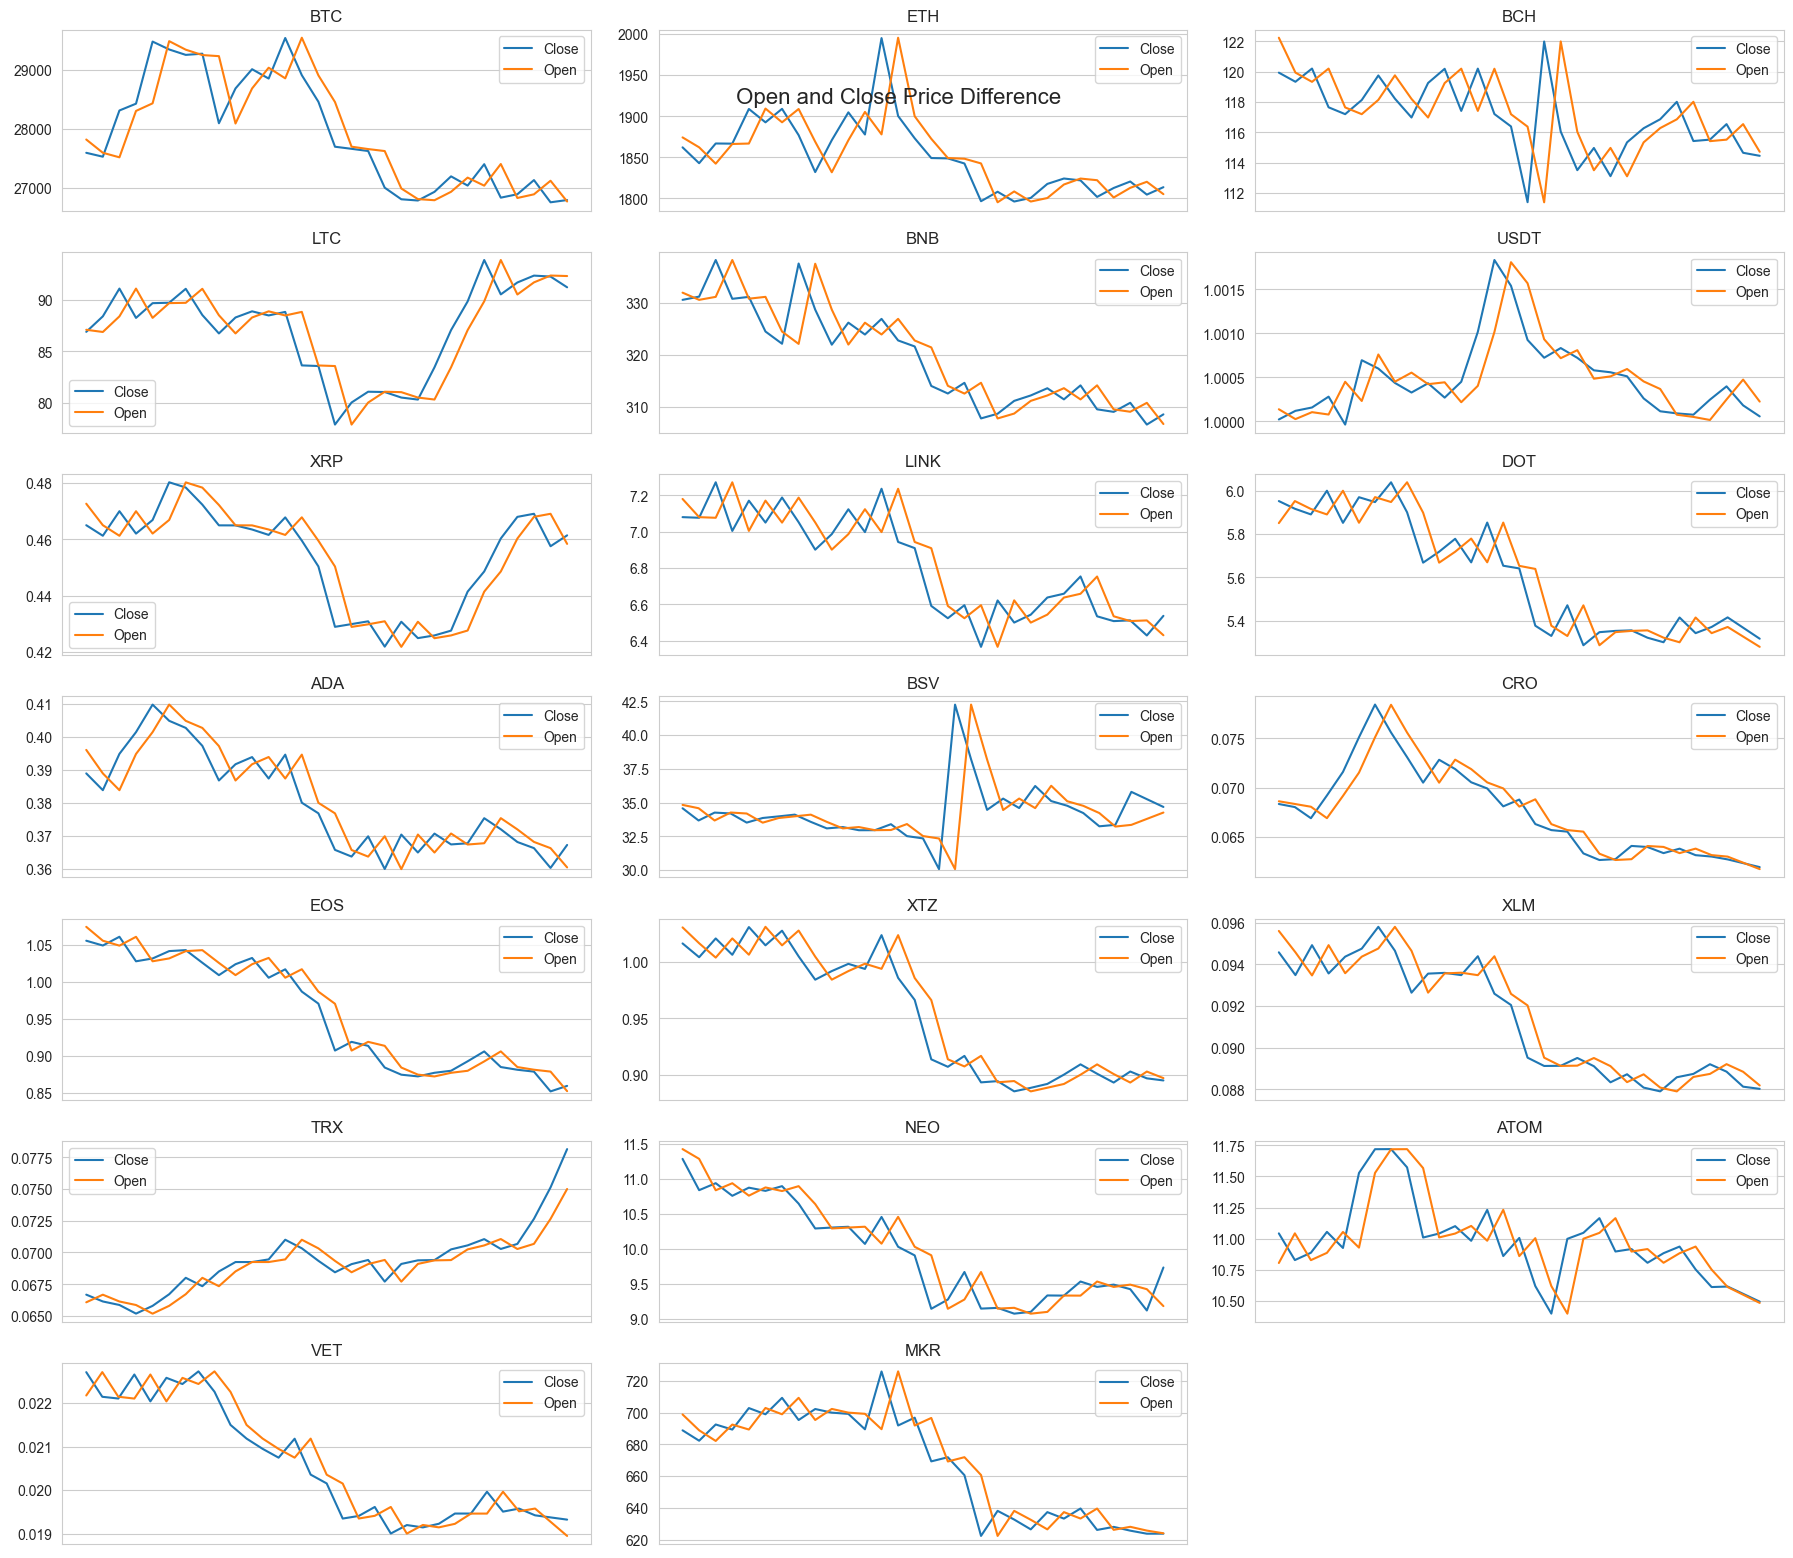

In [ ]:
# Create a list of unique coin names
coin_list = data["crypto_currency"].unique()

# Create figure to display plot
fig = plt.figure(figsize=(18, 16))
# Add title to the figure
fig.suptitle('Closing Price For Each Coin', fontsize=16, y=0.92)

# Loop through each coin to show closing price
for i, coin in enumerate(coin_list):
    data2 = data[data["crypto_currency"] == coin]
    plt.subplot(7, 3, i + 1)
    # Plot the closing prices
    plt.plot(data2.index, data2['Close'], label='Close')
    # Add title to subplot
    plt.title(coin)
    # Remove x-axis tick labels
    plt.xticks([])
    # Add y-axis label
    plt.ylabel('Closing Price')
    # Add legend
    plt.legend()

# Adjust subplot spacing
plt.tight_layout()
# Display figure
plt.show()

# Create a list of unique coin names
coin_list = data["crypto_currency"].unique()

# Create figure to display plot
fig = plt.figure(figsize=(18, 16))
# Add title to the figure
fig.suptitle('Open and Close Price Difference', fontsize=16, y=0.92)

# Loop through each coin to show open and close price difference
for i, coin in enumerate(coin_list):
    coin_data = data[data["crypto_currency"] == coin]
    plt.subplot(7, 3, i + 1)
    plt.plot(coin_data.index[-30:], coin_data['Close'].values[-30:], label='Close')
    plt.plot(coin_data.index[-30:], coin_data['Open'].values[-30:], label='Open')
    plt.title(coin)
    plt.legend()
    plt.xticks([])

# Adjust subplot spacing
plt.tight_layout()
# Display figure
plt.show()

/var/folders/7l/jpb0cm3n2zngg4856njlnn4m0000gn/T/ipykernel_31215/4049825001.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mean', y=e_stats.index, data=e_stats, xerr=e_stats['std'], ci=None, orient='h', ax=axes[1])


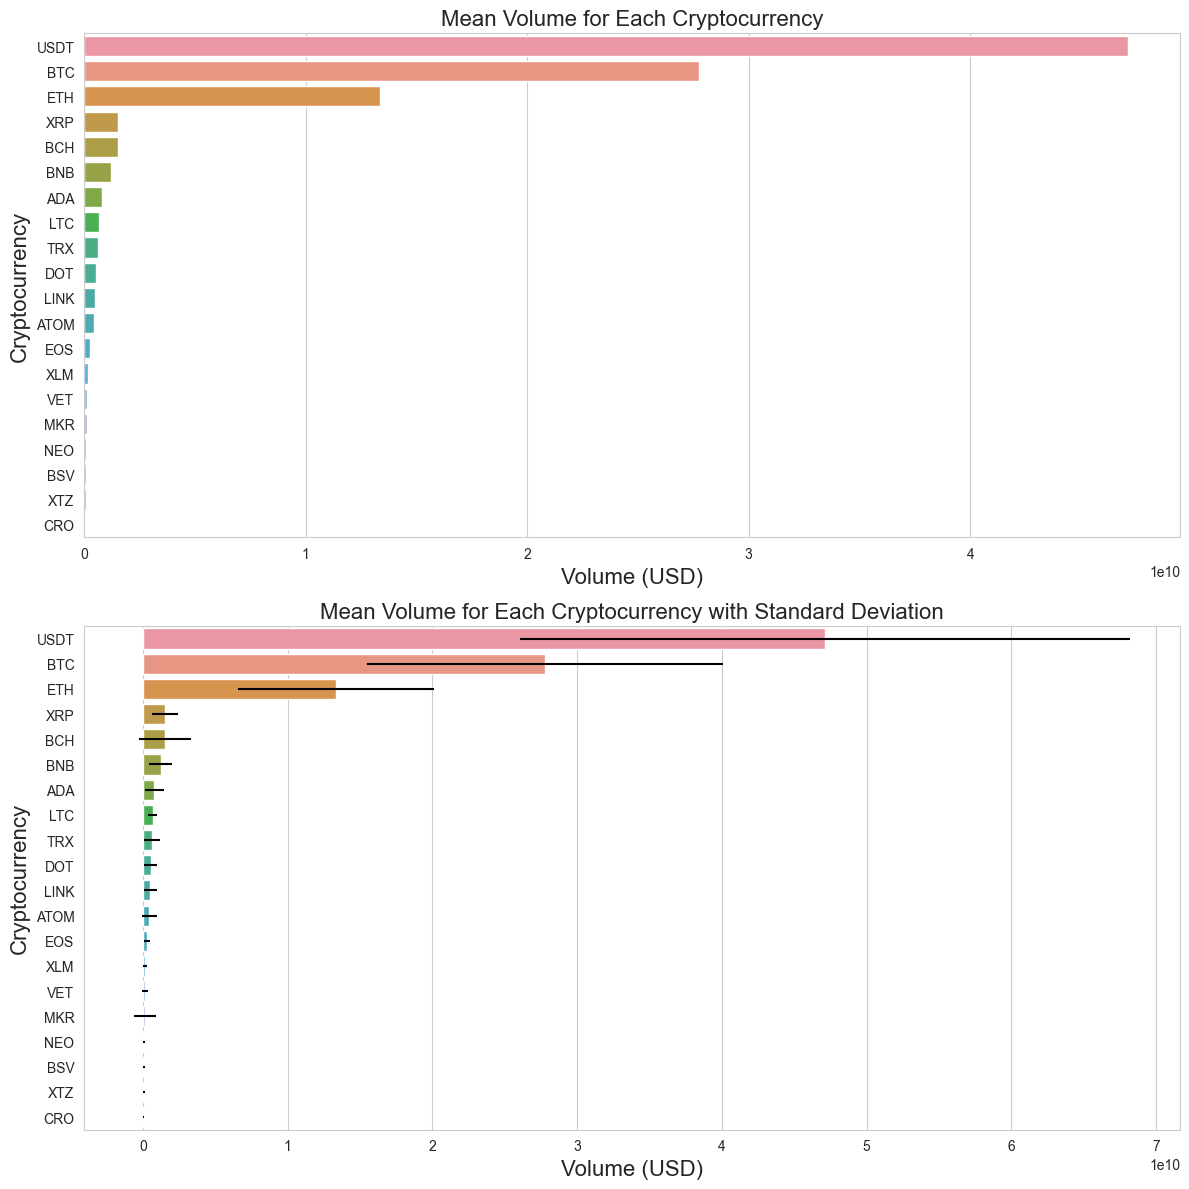

In [ ]:
# Calculate the mean and standard deviation of the volume for each coin
e_stats = data.groupby('crypto_currency')['Volume'].agg(['mean', 'std'])
e_stats.sort_values('mean', ascending=False, inplace=True)

# Create the figure and axes
fig, axes = plt.subplots(nrows=2, figsize=(12, 12))

# Plot the bar plot for mean volume
sns.barplot(x='mean', y=e_stats.index, data=e_stats, orient='h', ax=axes[0])
axes[0].set_xlabel('Volume (USD)', fontsize=16)
axes[0].set_ylabel('Cryptocurrency', fontsize=16)
axes[0].set_title('Mean Volume for Each Cryptocurrency', fontsize=16)

# Plot the bar plot with error bars for mean volume and standard deviation
sns.barplot(x='mean', y=e_stats.index, data=e_stats, xerr=e_stats['std'], ci=None, orient='h', ax=axes[1])
axes[1].set_xlabel('Volume (USD)', fontsize=16)
axes[1].set_ylabel('Cryptocurrency', fontsize=16)
axes[1].set_title('Mean Volume for Each Cryptocurrency with Standard Deviation', fontsize=16)

# Adjust the layout and spacing
plt.tight_layout()

# Display the plot
plt.show()

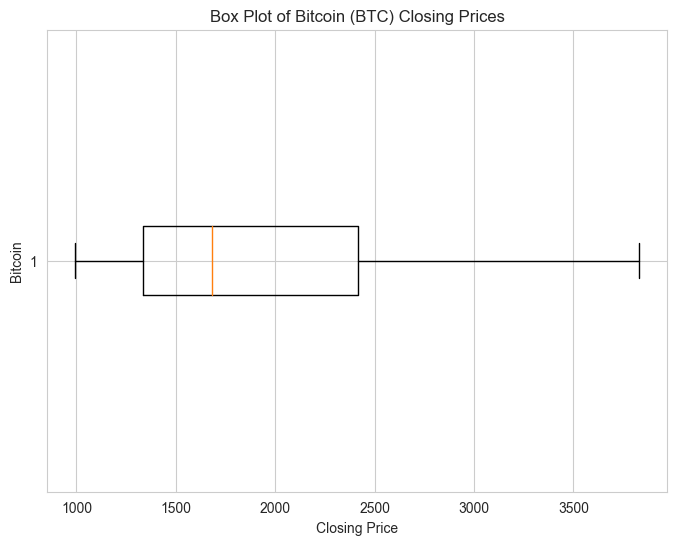

In [ ]:
# Create a box plot of Bitcoin closing prices
plt.figure(figsize=(8, 6))
plt.boxplot(btc_data, vert=False)
plt.title('Box Plot of Bitcoin (BTC) Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Bitcoin')
plt.show()

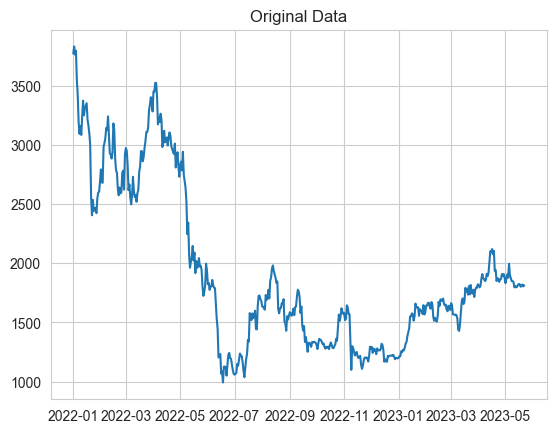

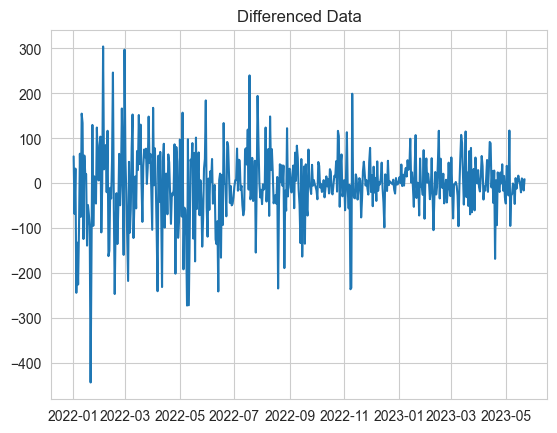

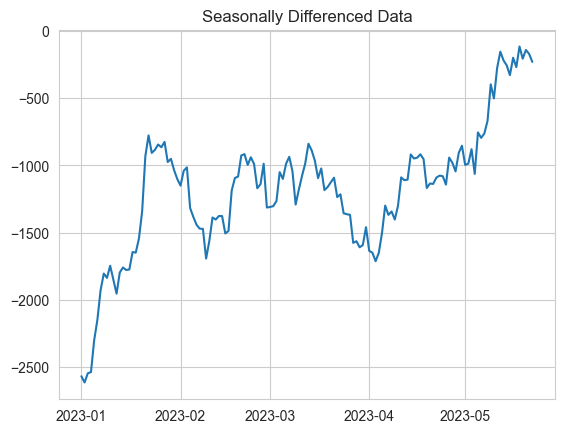

In [ ]:
# Plot the original data
plt.plot(btc_data)
plt.title('Original Data')
plt.show()

# Compute the first difference of the data
diff_data = btc_data.diff().dropna()

# Plot the differenced data
plt.plot(diff_data)
plt.title('Differenced Data')
plt.show()

# Compute the seasonal difference of the data
seasonal_diff_data = btc_data.diff(365).dropna()

# Plot the seasonally differenced data
plt.plot(seasonal_diff_data)
plt.title('Seasonally Differenced Data')
plt.show()

In [ ]:
for col in data.columns:
    miss_data_perc = np.mean(data[col].isnull())
    print('{}.{:.0f}%'.format(col,miss_data_perc*100))

Open.0%
High.0%
Low.0%
Close.0%
Adj Close.0%
Volume.0%
crypto_currency.0%


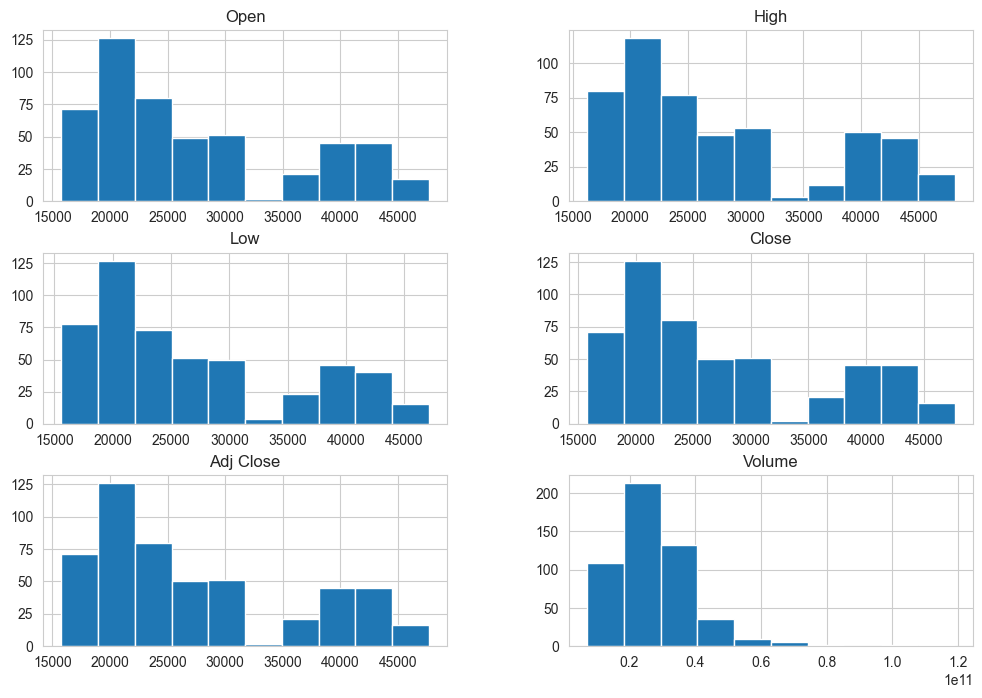

In [ ]:
# Selecting BTC data from my Concatenated dataset
btc_data = data[data['crypto_currency'] == 'BTC']
# Selecting only the numeric columns
btc_numeric = btc_data.select_dtypes(exclude=["bool"])
# Plotting the histogram
btc_numeric.hist(figsize=(12, 8))
plt.show()


In [ ]:
btc_data.skew()

/var/folders/7l/jpb0cm3n2zngg4856njlnn4m0000gn/T/ipykernel_31215/2708891176.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  btc_data.skew()


Open         0.705847
High         0.693666
Low          0.722346
Close        0.709257
Adj Close    0.709257
Volume       2.136767
dtype: float64

/var/folders/7l/jpb0cm3n2zngg4856njlnn4m0000gn/T/ipykernel_31215/857895207.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(btc_data['Close'], shade=True, color='red')


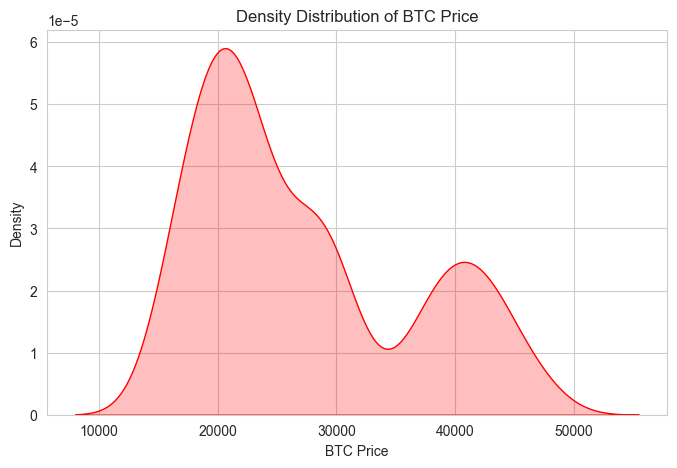

In [ ]:
# Subset the data for BTC
btc_data = data[data['crypto_currency'] == 'BTC']

# Plot the density distribution for BTC
plt.figure(figsize=(8, 5))
sns.kdeplot(btc_data['Close'], shade=True, color='red')
plt.xlabel('BTC Price')
plt.ylabel('Density')
plt.title('Density Distribution of BTC Price')
plt.show()


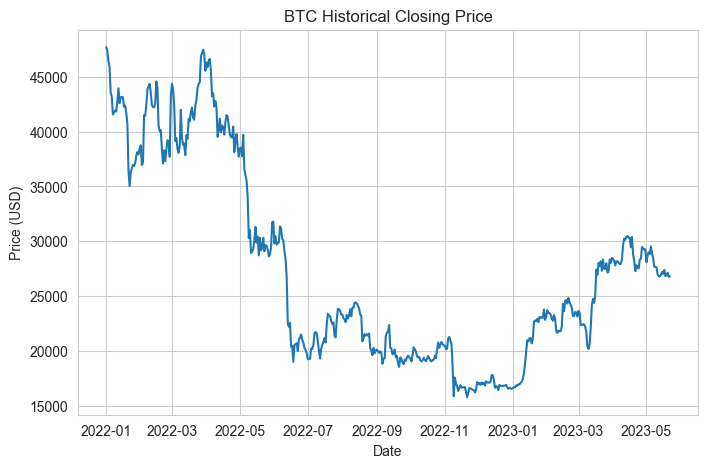

In [ ]:
# Select only the data for BTC
btc_data = data[data['crypto_currency'] == 'BTC']

# Plot the closing price for BTC
plt.figure(figsize=(8, 5))
plt.plot(btc_data.index, btc_data['Close'])
plt.title('BTC Historical Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [ ]:
### Check for Moving Average at 100
ma20 =btc_data.Close.rolling(20).mean()
ma20

Date
2022-01-01             NaN
2022-01-02             NaN
2022-01-03             NaN
2022-01-04             NaN
2022-01-05             NaN
                  ...     
2023-05-18    27949.653125
2023-05-19    27831.735156
2023-05-20    27724.774121
2023-05-21    27657.887012
2023-05-22    27563.458203
Name: Close, Length: 507, dtype: float64

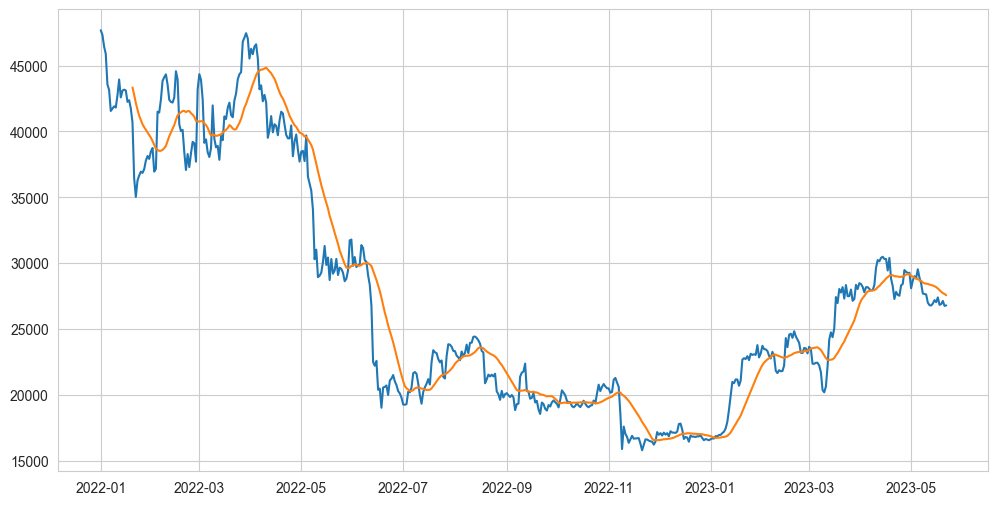

In [ ]:
# Plotting the moving average for BTC at 100
plt.figure(figsize = (12,6))
plt.plot(btc_data.Close)
plt.plot(ma20)

In [ ]:
### Check for Moving Average at 100
ma50 =btc_data.Close.rolling(50).mean()
ma50

Date
2022-01-01             NaN
2022-01-02             NaN
2022-01-03             NaN
2022-01-04             NaN
2022-01-05             NaN
                  ...     
2023-05-18    28454.301016
2023-05-19    28431.432344
2023-05-20    28404.454375
2023-05-21    28371.310195
2023-05-22    28343.163242
Name: Close, Length: 507, dtype: float64

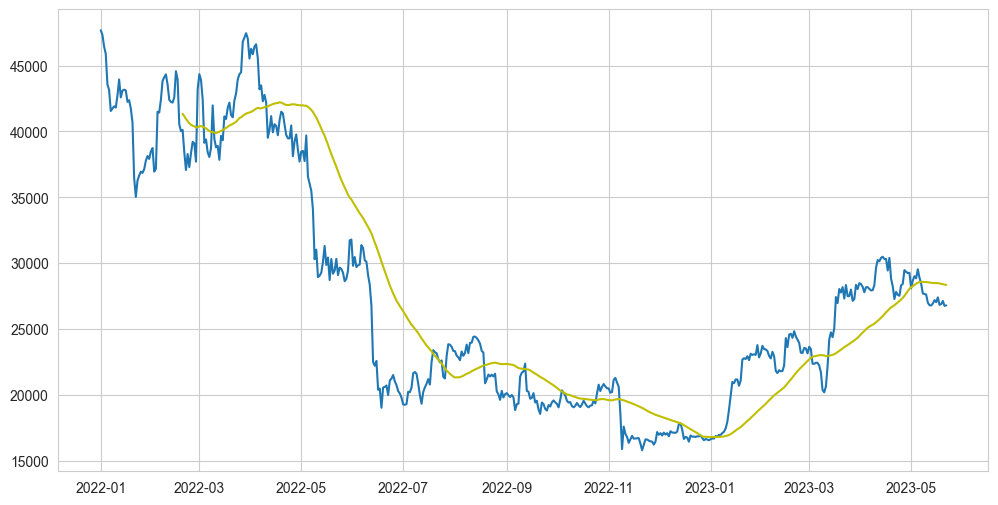

In [ ]:
# Plotting the moving average for BTC at 100
plt.figure(figsize = (12,6))
plt.plot(btc_data.Close)
plt.plot(ma50, 'y')

In [ ]:
### Check for Moving Average at 100
ma100 =btc_data.Close.rolling(100).mean()
ma100

Date
2022-01-01             NaN
2022-01-02             NaN
2022-01-03             NaN
2022-01-04             NaN
2022-01-05             NaN
                  ...     
2023-05-18    26343.971523
2023-05-19    26383.478828
2023-05-20    26436.584297
2023-05-21    26487.610723
2023-05-22    26536.821582
Name: Close, Length: 507, dtype: float64

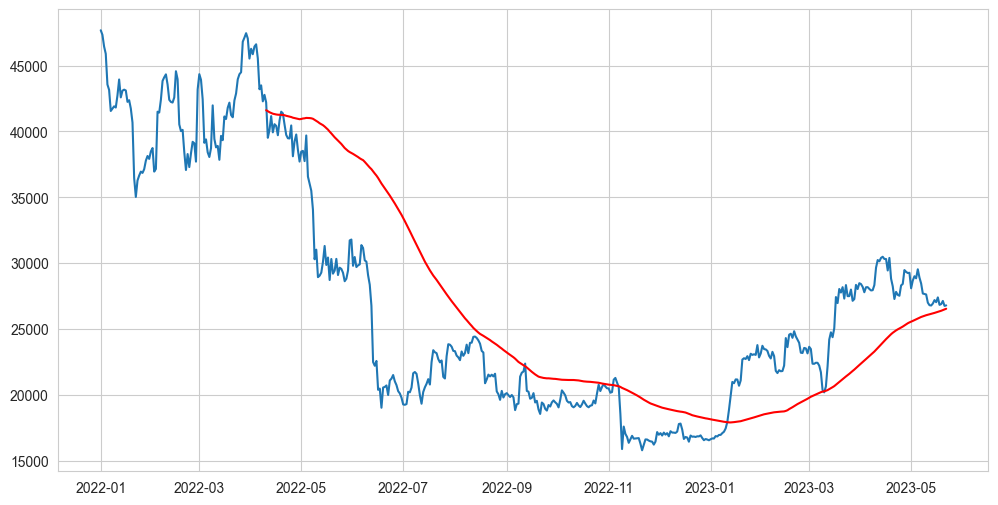

In [ ]:
# Plotting the moving average for BTC at 100
plt.figure(figsize = (12,6))
plt.plot(btc_data.Close)
plt.plot(ma100, 'r')

In [ ]:
# Check for Moving Average at 200
ma200 =btc_data.Close.rolling(200).mean()
ma200


Date
2022-01-01             NaN
2022-01-02             NaN
2022-01-03             NaN
2022-01-04             NaN
2022-01-05             NaN
                  ...     
2023-05-18    22495.421738
2023-05-19    22527.393516
2023-05-20    22560.615078
2023-05-21    22593.586689
2023-05-22    22626.496553
Name: Close, Length: 507, dtype: float64

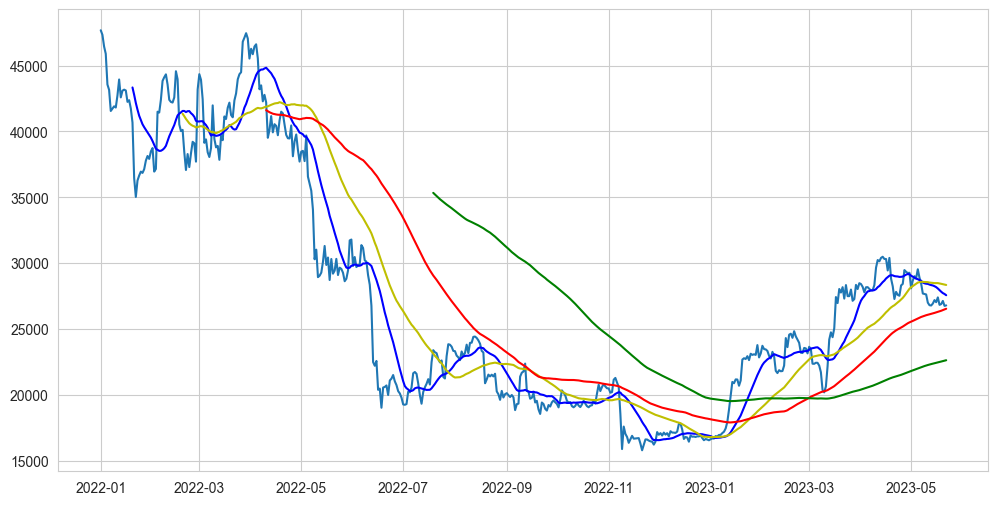

In [ ]:
# Plotting the moving average for BTC at 100
plt.figure(figsize = (12,6))
plt.plot(btc_data.Close)
plt.plot(ma20, 'b')
plt.plot(ma50, 'y')
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

/var/folders/7l/jpb0cm3n2zngg4856njlnn4m0000gn/T/ipykernel_31215/4287688287.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999784  0.999703  0.999452   0.999452  0.390105
High       0.999784  1.000000  0.999640  0.999740   0.999740  0.391247
Low        0.999703  0.999640  1.000000  0.999757   0.999757  0.387941
Close      0.999452  0.999740  0.999757  1.000000   1.000000  0.389351
Adj Close  0.999452  0.999740  0.999757  1.000000   1.000000  0.389351
Volume     0.390105  0.391247  0.387941  0.389351   0.389351  1.000000


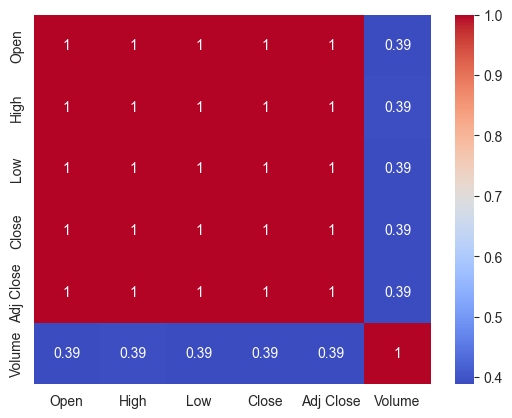

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Print the correlation matrix
print(corr_matrix)

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Pivot the data to get each cryptocurrency in a separate column
data = data.reset_index().pivot(index="Date", columns="crypto_currency", values="Close")


In [ ]:
data

crypto_currency,ADA,ATOM,BCH,BNB,BSV,BTC,CRO,DOT,EOS,ETH,LINK,LTC,MKR,NEO,TRX,USDT,VET,XLM,XRP,XTZ
Date,,,,,,,,,,,,,,,,,,,,
2022-01-01,1.376975,36.170464,444.456177,527.352722,122.741875,47686.812500,0.585303,28.583582,3.135548,3769.697021,20.665089,150.697433,2426.903320,26.328039,0.076610,1.000500,0.086718,0.276335,0.849472,4.740467
2022-01-02,1.377584,35.603455,447.832642,531.396667,124.218079,47345.218750,0.587698,29.731167,3.253289,3829.564941,21.831890,151.255493,2472.184570,27.023569,0.077782,1.000460,0.087109,0.291703,0.859118,4.667668
2022-01-03,1.321637,39.300068,434.943848,512.135986,122.232208,46458.117188,0.567292,30.105101,3.192578,3761.380371,23.573906,148.461594,2399.009033,26.617945,0.077081,1.000165,0.085840,0.290181,0.832885,4.802002
2022-01-04,1.311658,41.987125,427.524323,507.506104,121.191017,45897.574219,0.551803,28.777731,3.174801,3794.056641,23.525866,146.812286,2451.339600,26.090160,0.076200,1.000208,0.086006,0.279667,0.824673,5.003270
2022-01-05,1.236002,38.793358,401.572510,475.056946,114.693733,43569.003906,0.504330,26.796141,2.906571,3550.386963,25.447802,136.089111,2252.203125,24.546019,0.071382,1.000122,0.084987,0.267280,0.774358,4.528895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-18,0.372078,10.751800,115.428497,309.456696,33.245007,26832.208984,0.063142,5.341459,0.884456,1801.728516,6.534812,90.542908,626.032959,9.454846,0.070276,1.000077,0.019506,0.088740,0.460299,0.901266
2023-05-19,0.368215,10.609885,115.521477,308.964294,33.352955,26890.128906,0.063001,5.370039,0.880787,1812.589478,6.508409,91.702385,627.951355,9.487222,0.070675,1.000248,0.019576,0.089204,0.467982,0.893483
2023-05-20,0.366357,10.614003,116.541748,310.719971,35.797001,27129.585938,0.062713,5.414481,0.878257,1820.478027,6.512511,92.371315,625.575134,9.422283,0.072650,1.000399,0.019421,0.088848,0.469081,0.903219


In [132]:
data.describe()

crypto_currency,ADA,ATOM,BCH,BNB,BSV,BTC,CRO,DOT,EOS,ETH,LINK,LTC,MKR,NEO,TRX,USDT,VET,XLM,XRP,XTZ
count,507.000000,506.000000,507.000000,507.000000,506.000000,507.000000,506.000000,506.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,506.000000,507.000000,507.000000,507.000000
mean,0.565374,15.712863,176.933474,320.223870,57.527212,27267.992149,0.182433,10.019535,1.449653,1905.952892,9.395923,82.576431,1101.395990,12.603008,0.064524,1.000102,0.032781,0.129577,0.488214,1.849741
std,0.289954,8.340743,92.832290,61.934291,21.368538,8988.550694,0.147874,6.095949,0.608078,678.039285,4.572099,25.245661,537.004589,5.866911,0.006745,0.000816,0.017159,0.050916,0.160959,1.021569
min,0.244140,6.082700,89.351791,197.042999,30.072420,15787.284180,0.055219,4.282459,0.821194,993.636780,5.467445,43.300301,505.035248,6.061984,0.050036,0.995872,0.015614,0.071147,0.308090,0.717410
25%,0.368975,10.516173,114.667419,277.881500,42.068004,20143.540039,0.071896,6.072222,1.026516,1336.998474,6.822993,59.977598,693.310089,8.532270,0.060915,0.999991,0.022573,0.090939,0.373800,1.094503
50%,0.450980,12.025309,126.731865,307.695831,49.984032,23723.769531,0.114692,6.936004,1.187733,1681.517334,7.250481,80.263535,883.249329,10.299660,0.064098,1.000120,0.024386,0.111219,0.413892,1.446897
75%,0.748111,16.564730,265.240723,356.029999,70.373569,34544.757812,0.267939,13.645259,1.918105,2414.091187,10.114968,99.613811,1444.143372,16.101080,0.068296,1.000313,0.044527,0.164695,0.574437,2.488613
max,1.594131,43.605412,447.832642,531.396667,124.218079,47686.812500,0.587698,30.105101,3.253289,3829.564941,27.883266,151.667267,2472.184570,28.278837,0.087527,1.007690,0.087109,0.291703,0.878194,5.003270


In [133]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 507 entries, 2022-01-01 to 2023-05-22
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ADA     507 non-null    float64
 1   ATOM    506 non-null    float64
 2   BCH     507 non-null    float64
 3   BNB     507 non-null    float64
 4   BSV     506 non-null    float64
 5   BTC     507 non-null    float64
 6   CRO     506 non-null    float64
 7   DOT     506 non-null    float64
 8   EOS     507 non-null    float64
 9   ETH     507 non-null    float64
 10  LINK    507 non-null    float64
 11  LTC     507 non-null    float64
 12  MKR     507 non-null    float64
 13  NEO     507 non-null    float64
 14  TRX     507 non-null    float64
 15  USDT    507 non-null    float64
 16  VET     506 non-null    float64
 17  XLM     507 non-null    float64
 18  XRP     507 non-null    float64
 19  XTZ     507 non-null    float64
dtypes: float64(20)
memory usage: 83.2 KB


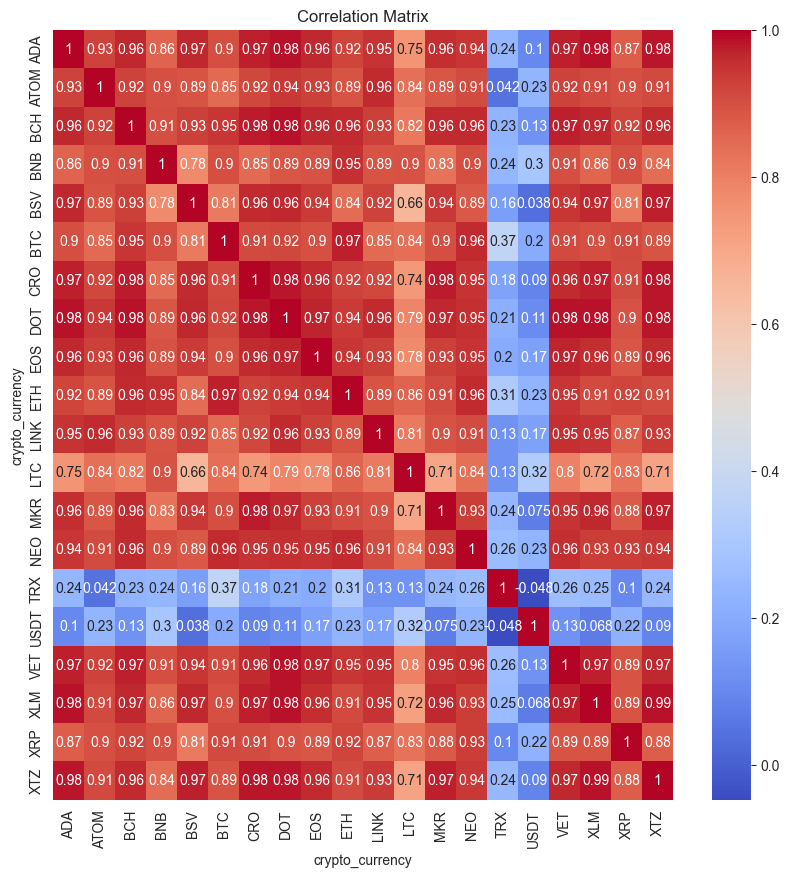

Top 10 cryptocurrencies positively correlated with Bitcoin:
crypto_currency
ETH    0.974113
NEO    0.962309
BCH    0.945005
DOT    0.915919
VET    0.913283
XRP    0.912351
CRO    0.912129
MKR    0.904784
ADA    0.904774
BNB    0.904527
Name: BTC, dtype: float64
Top 10 cryptocurrencies negatively correlated with Bitcoin:
Series([], Name: BTC, dtype: float64)


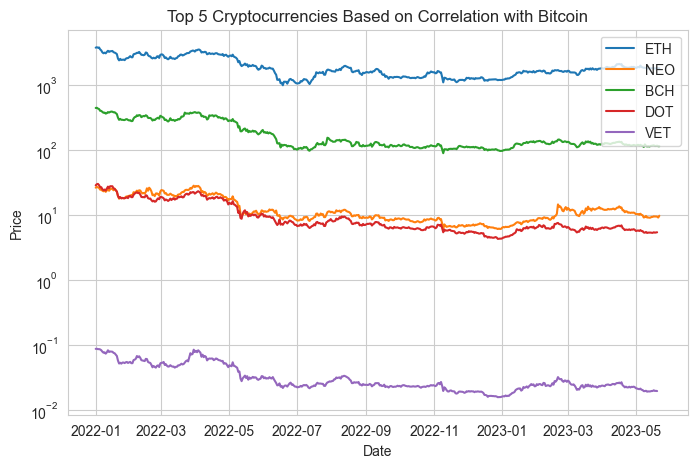

In [134]:
# Scale data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(data)

# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Filter the correlation matrix for variables that have a positive correlation with Bitcoin
positive_corr = corr_matrix['BTC'][corr_matrix['BTC'] > 0.5].sort_values(ascending=False)[1:11]
print("Top 10 cryptocurrencies positively correlated with Bitcoin:")
print(positive_corr)

# Filter the correlation matrix for variables that have a negative correlation with Bitcoin
negative_corr = corr_matrix['BTC'][corr_matrix['BTC'] < -0.5].sort_values(ascending=True)[:10]
print("Top 10 cryptocurrencies negatively correlated with Bitcoin:")
print(negative_corr)

# Plot the top 5 cryptocurrencies based on their correlation with Bitcoin
top_5 = corr_matrix.abs().nlargest(6, 'BTC')['BTC'].index[1:]
plt.figure(figsize=(8, 5))
for crypto_currency in top_5:
    plt.plot(data[crypto_currency], label=crypto_currency)
plt.yscale('log')
plt.title('Top 5 Cryptocurrencies Based on Correlation with Bitcoin')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()

